In [1]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

In [4]:
def make_model(num_hidden_layers:int, hidden_layer_size:int, activation='relu'):
    return Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', MLPClassifier(activation=activation, random_state=42, solver='adam', hidden_layer_sizes=[hidden_layer_size]*num_hidden_layers, max_iter=10000))]
)

In [3]:
# Load the dataset
df = pd.read_csv( "smoke_detection_iot.csv" )

# Drop the unnecessary columns
data = df.drop( [ 'Index', 'UTC', 'CNT' ], axis=1 )

# Split the data into features ( X ) and target variable ( Y )
x_features = data.drop( 'Fire Alarm', axis=1 )
y_target = data[ 'Fire Alarm' ]

# Split data into training and testing sets ( 80% training, 20% testing )
x_train, x_test, y_train, y_test = train_test_split( x_features, y_target, test_size=0.2 )

In [14]:
models = [[None]*5]*5
for i in range(5):
    for j in range(5):
        models[i][j] = make_model(j+1, (i+1)*5, 'relu').fit(x_train, y_train)

In [15]:
accuracy_scores = [[accuracy_score(y_test, model.predict(x_test)) for model in mods] for mods in models]

Text(0.5, 1.0, 'Accuracy vs Number of Hidden Layers')

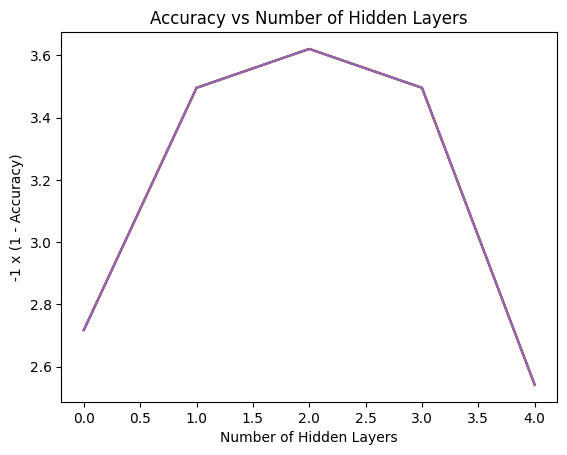

In [18]:
plt.plot(-1*np.log10(1-np.array(accuracy_scores[0])))
plt.plot(-1*np.log10(1-np.array(accuracy_scores[1])))
plt.plot(-1*np.log10(1-np.array(accuracy_scores[2])))
plt.plot(-1*np.log10(1-np.array(accuracy_scores[3])))
plt.plot(-1*np.log10(1-np.array(accuracy_scores[4])))
plt.xlabel('Number of Hidden Layers')
plt.ylabel('-1 x (1 - Accuracy)')
plt.title('Accuracy vs Number of Hidden Layers')